In [68]:
import qiskit
from qiskit import *

In [69]:
def carry(circuit, qr, start_index):
    circuit.ccx(qr[start_index + 1], qr[start_index + 2], qr[start_index + 3])
    circuit.cx(qr[start_index + 1], qr[start_index +2]) 
    circuit.ccx(qr[start_index], qr[start_index + 2], qr[start_index + 3])

In [70]:
def carrydg(circuit, qr, start_index):
    circuit.ccx(qr[start_index], qr[start_index + 2], qr[start_index + 3])
    circuit.cx(qr[start_index + 1], qr[start_index +2])
    circuit.ccx(qr[start_index + 1], qr[start_index + 2], qr[start_index + 3])

In [71]:
def qrsum(circuit, qr, start_index):
    circuit.cx(qr[start_index + 1], qr[start_index + 2])
    circuit.cx(qr[start_index], qr[start_index + 2])

In [81]:
def make_adder(circuit, qr, n):
    if n % 3 != 0:
        raise ValueError("n must be a multiple of 3")
        
    # top to bottom
    for i in range(0, n - 2, 3):
        carry(circuit, qr, i)
        circuit.barrier()
    
    circuit.cx(qr[n - 2], qr[n - 1])
    qrsum(circuit, qr, n - 3)
    circuit.barrier()
    
    # bottom to top
    for i in range(n - 6, -1, -3):
        carrydg(circuit, qr, i)
        circuit.barrier()
        qrsum(circuit, qr, i)
        circuit.barrier()


ibmqfactory.load_account:WARNING:2020-06-30 21:01:11,851: Credentials are already in use. The existing account in the session will be replaced.


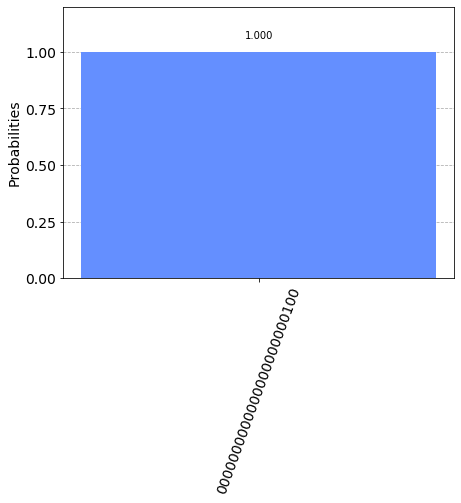

In [87]:
# mod test
size = 24 # n: 3
qr = QuantumRegister(size + 1)
cr = ClassicalRegister(size + 1)
circuit = QuantumCircuit(qr, cr)
# 1001 + 1010

#a
#circuit.x(1)
circuit.x(4)
#circuit.x(7)
circuit.x(10)

# b
#circuit.x(2)
circuit.x(5)
#circuit.x(8)
circuit.x(11)

make_adder(circuit, qr, size)

circuit.measure(qr[2], cr[0])
circuit.measure(qr[5], cr[1])
circuit.measure(qr[8], cr[2])
"""
i = 2
j = 0
while (i < size - 2):
    circuit.measure(qr[i], cr[j])
    i += 3
    j += 1
    """
    
circuit.draw()
    
IBMQ.load_account()

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

ibmqfactory.load_account:WARNING:2020-06-30 17:45:32,817: Credentials are already in use. The existing account in the session will be replaced.


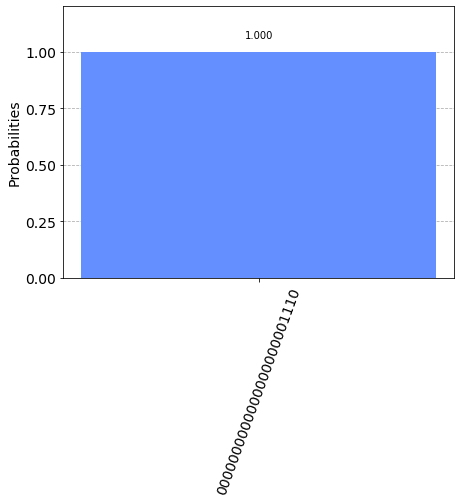

In [74]:
# adder test
size = 24
qr = QuantumRegister(size + 1)
cr = ClassicalRegister(size + 1)
circuit = QuantumCircuit(qr, cr)

circuit.x(1) # a0
circuit.x(2) # b0
circuit.x(4) # a1
circuit.x(5) # b1
circuit.x(7) # a2
circuit.x(8) # b2

circuit.barrier()
make_adder(circuit, qr, size)
i = 2
j = 0
while (i < size + 1):
    circuit.measure(qr[i], cr[j])
    i += 3
    j += 1
# circuit.measure(qr[i - 2], cr[j])
circuit.draw()

IBMQ.load_account()

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [55]:
size = 18
qr = QuantumRegister(size + 1)
cr = ClassicalRegister(4)
circuit = QuantumCircuit(qr, cr)
make_adder(circuit, qr, 18)
circuit.draw()

░                 ░                 ░                »
 q13_0: ────────────■───░─────────────────░─────────────────░────────────────»
                    │   ░                 ░                 ░                »
 q13_1: ──■────■────┼───░─────────────────░─────────────────░────────────────»
          │  ┌─┴─┐  │   ░                 ░                 ░                »
 q13_2: ──■──┤ X ├──■───░─────────────────░─────────────────░────────────────»
        ┌─┴─┐└───┘┌─┴─┐ ░                 ░                 ░                »
 q13_3: ┤ X ├─────┤ X ├─░─────────────■───░─────────────────░────────────────»
        └───┘     └───┘ ░             │   ░                 ░                »
 q13_4: ────────────────░───■────■────┼───░─────────────────░────────────────»
                        ░   │  ┌─┴─┐  │   ░                 ░                »
 q13_5: ────────────────░───■──┤ X ├──■───░─────────────────░────────────────»
                        ░ ┌─┴─┐└───┘┌─┴─┐ ░                 ░                »
 q13_6: ────────────────░─┤ X ├─────┤ X ├─░─────────────■───░────────────────»
                        ░ └───┘     └───┘ ░             │   ░                »
 q13_7: ────────────────░─────────────────░───■────■────┼───░────────────────»
                        ░                 ░   │  ┌─┴─┐  │   ░                »
 q13_8: ────────────────░─────────────────░───■──┤ X ├──■───░────────────────»
                        ░                 ░ ┌─┴─┐└───┘┌─┴─┐ ░                »
 q13_9: ────────────────░─────────────────░─┤ X ├─────┤ X ├─░─────────────■──»
                        ░                 ░ └───┘     └───┘ ░             │  »
q13_10: ────────────────░─────────────────░─────────────────░───■────■────┼──»
                        ░                 ░                 ░   │  ┌─┴─┐  │  »
q13_11: ────────────────░─────────────────░─────────────────░───■──┤ X ├──■──»
                        ░                 ░                 ░ ┌─┴─┐└───┘┌─┴─┐»
q13_12: ────────────────░─────────────────░─────────────────░─┤ X ├─────┤ X ├»
                        ░                 ░                 ░ └───┘     └───┘»
q13_13: ────────────────░─────────────────░─────────────────░────────────────»
                        ░                 ░                 ░                »
q13_14: ────────────────░─────────────────░─────────────────░────────────────»
                        ░                 ░                 ░                »
q13_15: ────────────────░─────────────────░─────────────────░────────────────»
                        ░                 ░                 ░                »
q13_16: ────────────────░─────────────────░─────────────────░────────────────»
                        ░                 ░                 ░                »
q13_17: ────────────────░─────────────────░─────────────────░────────────────»
                        ░                 ░                 ░                »
q13_18: ────────────────░─────────────────░─────────────────░────────────────»
                        ░                 ░                 ░                »
 c13_0: ═════════════════════════════════════════════════════════════════════»
                                                                             »
 c13_1: ═════════════════════════════════════════════════════════════════════»
                                                                             »
 c13_2: ═════════════════════════════════════════════════════════════════════»
                                                                             »
 c13_3: ═════════════════════════════════════════════════════════════════════»
                                                                             »
«         ░                 ░                 ░                 ░           »
« q13_0: ─░─────────────────░─────────────────░─────────────────░───────────»
«         ░                 ░                 ░                 ░           »
« q13_1: ─░─────────────────░─────────────────░─────────────────░───────────»

In [11]:
qr = QuantumRegister(4)
cr = ClassicalRegister(4)
circuit = QuantumCircuit(qr, cr)
circuit.draw()

q0_0: 
      
q0_1: 
      
q0_2: 
      
q0_3: 
      
c0_0: 
      
c0_1: 
      
c0_2: 
      
c0_3:

In [13]:
for i in range(3):
    carry(circuit, qr, 0)
circuit.draw()

q0_0: ────────────■──────────────■──────────────■──────────────■──
                  │              │              │              │  
q0_1: ──■────■────■────■────■────■────■────■────■────■────■────■──
        │  ┌─┴─┐┌─┴─┐  │  ┌─┴─┐┌─┴─┐  │  ┌─┴─┐┌─┴─┐  │  ┌─┴─┐┌─┴─┐
q0_2: ──■──┤ X ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├┤ X ├
      ┌─┴─┐└───┘└───┘┌─┴─┐└───┘└───┘┌─┴─┐└───┘└───┘┌─┴─┐└───┘└───┘
q0_3: ┤ X ├──────────┤ X ├──────────┤ X ├──────────┤ X ├──────────
      └───┘          └───┘          └───┘          └───┘          
c0_0: ════════════════════════════════════════════════════════════
                                                                  
c0_1: ════════════════════════════════════════════════════════════
                                                                  
c0_2: ════════════════════════════════════════════════════════════
                                                                  
c0_3: ════════════════════════════════════════════════════════════

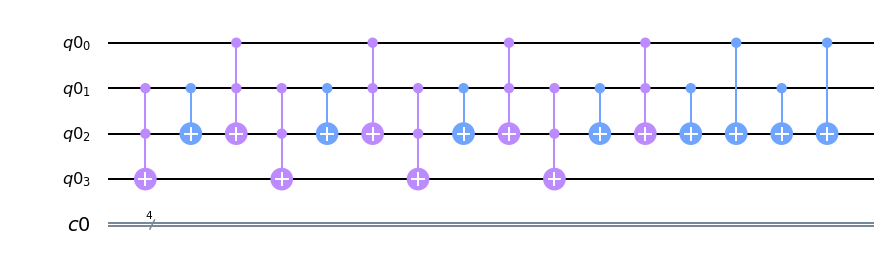

In [15]:
qrsum(circuit, qr, 0)
circuit.draw("mpl")

In [107]:
def carry2(circuit, qa, qb, qc, start_index):
    circuit.ccx(qa[start_index], qb[start_index], qc[start_index + 1])
    circuit.cx(qa[start_index], qb[start_index]) 
    circuit.ccx(qc[start_index], qb[start_index], qc[start_index + 1]) 

In [108]:
def carrydg2(circuit, qa, qb, qc, start_index):
    circuit.ccx(qc[start_index], qb[start_index], qc[start_index + 1]) 
    circuit.cx(qa[start_index], qb[start_index]) 
    circuit.ccx(qa[start_index], qb[start_index], qc[start_index + 1])

In [109]:
def qrsum2(circuit, qa, qb, qc, start_index):
    circuit.cx(qa[start_index], qb[start_index])
    circuit.cx(qc[start_index], qb[start_index])

In [149]:
def make_adder2(circuit, qa, qb, qc, n):
    if n % 3 != 0:
        raise ValueError("n must be a multiple of 3")
        
    # top to bottom
    for i in range(0, n, 1):
        carry2(circuit, qa, qb, qc, i)
        circuit.barrier()
    
    circuit.cx(qa[n - 1], qb[n - 1])
    qrsum2(circuit, qa, qb, qc, n - 1)
    circuit.barrier()
    
    # bottom to top
    for i in range(n - 2, -1, -1):
        carrydg2(circuit, qa, qb, qc, i)
        circuit.barrier()
        qrsum2(circuit, qa, qb, qc, i)
        circuit.barrier()

In [154]:
size = 3

qa = QuantumRegister(size, "qa")
qb = QuantumRegister(size, "qb")
qc = QuantumRegister(size + 1, "qc")
cr = ClassicalRegister(size * 3, "cr")

circ = QuantumCircuit(qa, qb, qc, cr)

circ.x(qa[0])
circ.x(qa[1])

circ.x(qb[0])
circ.x(qb[1])

make_adder2(circ, qa, qb, qc, size)
circ.barrier()
circ.draw()


┌───┐                ░                 ░                 ░           »
qa_0: ┤ X ├──■────■────────░─────────────────░─────────────────░───────────»
      ├───┤  │    │        ░                 ░                 ░           »
qa_1: ┤ X ├──┼────┼────────░───■────■────────░─────────────────░───────────»
      └───┘  │    │        ░   │    │        ░                 ░           »
qa_2: ───────┼────┼────────░───┼────┼────────░───■────■────────░───■────■──»
      ┌───┐  │  ┌─┴─┐      ░   │    │        ░   │    │        ░   │    │  »
qb_0: ┤ X ├──■──┤ X ├──■───░───┼────┼────────░───┼────┼────────░───┼────┼──»
      ├───┤  │  └───┘  │   ░   │  ┌─┴─┐      ░   │    │        ░   │    │  »
qb_1: ┤ X ├──┼─────────┼───░───■──┤ X ├──■───░───┼────┼────────░───┼────┼──»
      └───┘  │         │   ░   │  └───┘  │   ░   │  ┌─┴─┐      ░ ┌─┴─┐┌─┴─┐»
qb_2: ───────┼─────────┼───░───┼─────────┼───░───■──┤ X ├──■───░─┤ X ├┤ X ├»
             │         │   ░   │         │   ░   │  └───┘  │   ░ └───┘└───┘»
qc_0: ───────┼─────────■───░───┼─────────┼───░───┼─────────┼───░───────────»
           ┌─┴─┐     ┌─┴─┐ ░   │         │   ░   │         │   ░           »
qc_1: ─────┤ X ├─────┤ X ├─░───┼─────────■───░───┼─────────┼───░───────────»
           └───┘     └───┘ ░ ┌─┴─┐     ┌─┴─┐ ░   │         │   ░           »
qc_2: ─────────────────────░─┤ X ├─────┤ X ├─░───┼─────────■───░───────────»
                           ░ └───┘     └───┘ ░ ┌─┴─┐     ┌─┴─┐ ░           »
qc_3: ─────────────────────░─────────────────░─┤ X ├─────┤ X ├─░───────────»
                           ░                 ░ └───┘     └───┘ ░           »
cr_0: ═════════════════════════════════════════════════════════════════════»
                                                                           »
cr_1: ═════════════════════════════════════════════════════════════════════»
                                                                           »
cr_2: ═════════════════════════════════════════════════════════════════════»
                                                                           »
cr_3: ═════════════════════════════════════════════════════════════════════»
                                                                           »
cr_4: ═════════════════════════════════════════════════════════════════════»
                                                                           »
cr_5: ═════════════════════════════════════════════════════════════════════»
                                                                           »
cr_6: ═════════════════════════════════════════════════════════════════════»
                                                                           »
cr_7: ═════════════════════════════════════════════════════════════════════»
                                                                           »
cr_8: ═════════════════════════════════════════════════════════════════════»
                                                                           »
«            ░                 ░            ░                 ░            ░ »
«qa_0: ──────░─────────────────░────────────░────────■────■───░───■────────░─»
«            ░                 ░            ░        │    │   ░   │        ░ »
«qa_1: ──────░────────■────■───░───■────────░────────┼────┼───░───┼────────░─»
«            ░        │    │   ░   │        ░        │    │   ░   │        ░ »
«qa_2: ──────░────────┼────┼───░───┼────────░────────┼────┼───░───┼────────░─»
«            ░        │    │   ░   │        ░      ┌─┴─┐  │   ░ ┌─┴─┐┌───┐ ░ »
«qb_0: ──────░────────┼────┼───░───┼────────░───■──┤ X ├──■───░─┤ X ├┤ X ├─░─»
«            ░      ┌─┴─┐  │   ░ ┌─┴─┐┌───┐ ░   │  └───┘  │   ░ └───┘└─┬─┘ ░ »
«qb_1: ──────░───■──┤ X ├──■───░─┤ X ├┤ X ├─░───┼─────────┼───░────────┼───░─»
«      ┌───┐ ░   │  └───┘  │   ░ └───┘└─┬─┘ ░   │         │   ░        │   ░ »
«qb_2: ┤ X ├─░───┼─────────┼───░────────┼───░───┼─────────┼───░────────┼───░─»
«      └─┬─┘ ░   │         │   ░        │   ░   │      

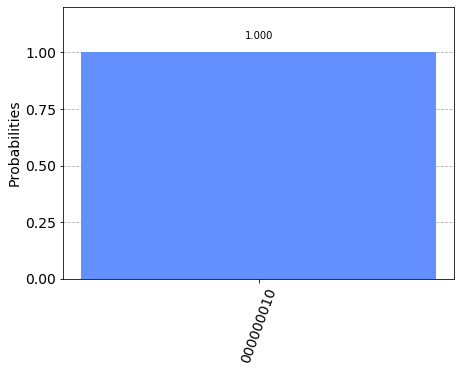

In [155]:
for i in range(size - 1):
    circ.measure(qb[i], cr[i])

#circ.measure(qc[size], cr[i + 1])

simulator = Aer.get_backend('qasm_simulator')
result = execute(circ, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [157]:
result.get_counts()

{'000000010': 1024}

In [171]:
a = list(result.get_counts().keys())
total = 0
for i in range(len(a[0]) - 1, -1, -1):
    if a[0][i] == '1':
        total += 2**(len(a[0]) - 1 - i)
total
        

2